In [102]:
import numpy as np
import tensorflow as tf

In [103]:
import matplotlib.pyplot as plt

In [104]:
x = np.array([[1,1], [0,0]]).T
y = np.array([1., -1.], dtype=np.float32).reshape(-1,1)
print(np.squeeze(y==1))

x_pos = x[ :, np.squeeze(y==1) ]
x_neg = x[ :, np.squeeze(y==-1) ]
print(x_pos)


[ True False]
[[1]
 [1]]


In [105]:
def draw_point(v, color):
    """
    v :   array shape=(n*2)
    color string 
    """
    plt.scatter(v[0],v[1], c = color)

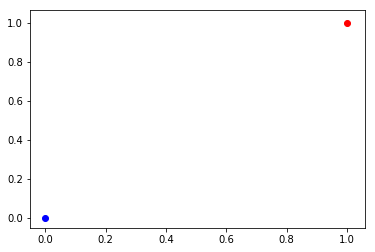

In [106]:
draw_point(x_pos, 'r')
draw_point(x_neg, 'b')
plt.show()

In [107]:
sess = tf.Session()

In [108]:
data_shape =(2, 2)
tensor_x = tf.placeholder(name = 'x',     dtype = tf.float32, shape =data_shape    )
tensor_y = tf.placeholder(name = 'symbol',dtype = tf.float32, shape =(data_shape[-1], 1))
tensor_a = tf.Variable(   name = 'alpha', dtype = tf.float32, initial_value=tf.random_normal(tensor_y.shape), validate_shape=False)

In [109]:
y_diag = tf.diag(tf.squeeze(y))
sess.run(y_diag,feed_dict={tensor_y : y})

array([[ 1.,  0.],
       [ 0., -1.]], dtype=float32)

In [110]:
H_0 = tf.matmul(tf.transpose(tensor_x), tensor_x)
#print(sess.run(H_0, feed_dict={tensor_x : x}))
y_diag = tf.diag(tf.squeeze(y))
print(H_0,y_diag)
H_1 = tf.matmul(y_diag, H_0)
H = tf.matmul(H_1, y_diag)
print(sess.run(H, feed_dict={tensor_x : x, tensor_y : y}))

Tensor("MatMul_34:0", shape=(2, 2), dtype=float32) Tensor("Diag_14:0", shape=(2, 2), dtype=float32)
[[ 2.  0.]
 [ 0.  0.]]


In [111]:
init = tf.variables_initializer([tensor_a])
sess.run(init)

In [112]:
prod_a_1 =tf.matmul(tf.transpose(tensor_a),H)
prod_a = tf.matmul(prod_a_1, tensor_a)

In [113]:
sess.run(prod_a, feed_dict={tensor_x : x, tensor_y : y})

array([[ 0.75581187]], dtype=float32)

In [114]:
sess.run(tensor_a.assign([[1],[1]]))
print(sess.run(tensor_a))

[[ 1.]
 [ 1.]]


In [115]:
Ld = tf.reduce_sum(tensor_a) - 0.5 * prod_a
sess.run(Ld, feed_dict={tensor_x : x, tensor_y : y})

array([[ 1.]], dtype=float32)

In [116]:
w_1 = tf.diag(tf.squeeze(tensor_a * tensor_y))
w_2 = tf.matmul(tensor_x, w_1)
#w = tf.reduce_sum(w_2, axis = 1)
w = tf.einsum("ij->i",w_2)
w_res = sess.run(w, feed_dict={tensor_x : x, tensor_y : y})
print(w_res )

[ 1.  1.]


In [117]:
sess.run(tensor_x,feed_dict={tensor_x : x})


tensor_x_1 = tf.placeholder(name='x1',dtype=tf.float32,shape=(2,))
#print(-w,tensor_x_1)

b = tf.einsum("i,i ->i",-w,tensor_x_1) + 1
b_res = sess.run(b, feed_dict={tensor_x : x, tensor_x_1 : x[:,0], tensor_y : y}) 
print(b_res)

-1.0


In [118]:
gx = tf.einsum("i,ij->j", w, tensor_x) + b
print(sess.run(gx, feed_dict={tensor_x : x, tensor_x_1 : x[:,0], tensor_y : y}) )

[ 1. -1.]


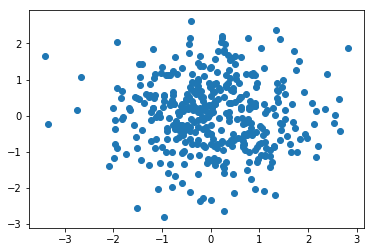

In [144]:
x_test = np.random.normal(size=(2,400))
plt.scatter(x_test[0],x_test[1])
plt.show()

(2, 400)


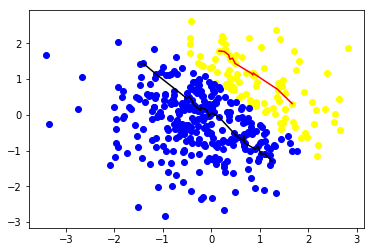

In [178]:
gx_output = np.einsum("i,ij ->j",w_res,x_test) + b_res
print(x_test.shape)
x_pos = x_test.T[0 < gx_output]
x_neg = x_test.T[gx_output < 0]

x_pos_sp = x_test.T[np.abs(gx_output-1)<1e-1]
x_neg_sp = x_test.T[np.abs(gx_output+1)<1e-1]

x_pos_sp = x_pos_sp[x_pos_sp[:,0].argsort()]
x_neg_sp = x_neg_sp[x_neg_sp[:,0].argsort()]

plt.scatter(x_pos[:,0],x_pos[:,1],c ='yellow')
plt.scatter(x_neg[:,0],x_neg[:,1],c ='b')
plt.plot(x_pos_sp[:,0],x_pos_sp[:,1],c ='r')
plt.plot(x_neg_sp[:,0],x_neg_sp[:,1],c ='black')
plt.show()